In [27]:
import numpy as np
import math as m
import networkx as nx
import matplotlib.pyplot as plt

In [28]:
def get_stimulus(A, beta, reward):
    arg = beta*(reward - A)
    return m.tanh(arg)

In [29]:
def update_p(aspiration_level, beta, reward, prev_action, p):
    s = get_stimulus(aspiration_level, beta, reward)
    if prev_action == 0: #previous action = cooperation
        if s >= 0:
            return p + (1-p)*s
        else:
            return p + p*s
    else: #previous action = defect
        if s >= 0:
            return p - p*s
        else:
            return p - (1-p)*s

In [30]:
def misimplement_prob_update(eps, prob):
    return prob*(1-eps) + (1-prob)*eps

In [31]:
def get_payoff_matrix(b,c):
    return np.array([[b-c, -c],
                     [b, 0]])

In [32]:
def get_payoffs(p1, p2):
    return payoff_mat[p1][p2]

In [33]:
def create_ring_graph(N, k):
    return nx.watts_strogatz_graph(N, k, 0)


#pos = nx.circular_layout(G_small_ring)
#plt.figure(3,figsize=(20,20)) 
#nx.draw_networkx(G_small_ring, pos=pos, with_labels=False)


In [80]:
def simulate_game(G, payoff_mat, k, rounds, A, beta, eps):
    nodes = len(list(G.nodes))
    probas = np.array([0.8 for _ in range(nodes)])
    counts = np.zeros(rounds)
    for r in range(rounds):
        payoffs = np.zeros(nodes)
        actions = np.random.binomial(1, p = (1 - probas))
        #print(actions)
        for node in list(G.nodes):
            for neighbour in list(G.neighbors(node)):
                payoffs[node] += get_payoffs(actions[node], actions[neighbour])
            payoffs[node]/k
        for node in list(G.nodes):
            probas[node] = misimplement_prob_update(eps, update_p(A, beta, payoffs[node], actions[node], probas[node]))
        counts[r] = nodes - np.count_nonzero(actions)
    return counts/nodes

In [81]:
N = 100
k = 2
G = create_ring_graph(N, k)
A = 1
beta = 0.2
eps = 0.05
payoff_mat = get_payoff_matrix(6, 1)

In [107]:
coops_lvl = []
for i in range(100):
    coops_lvl.append(simulate_game(G, payoff_mat, k, 50, A, beta, eps))
    
avg_coops = np.array([0. for _ in range(50)])
for i in range(50):
    for trial in coops_lvl:
        avg_coops[i] += trial[i]
avg_coops = avg_coops/100

0.83
0.73
0.8
0.82
0.79
0.82
0.84
0.81
0.82
0.83
0.76
0.72
0.77
0.8
0.78
0.78
0.78
0.82
0.81
0.77
0.86
0.85
0.77
0.81
0.79
0.79
0.77
0.81
0.83
0.77
0.77
0.76
0.86
0.82
0.74
0.82
0.89
0.78
0.77
0.81
0.84
0.81
0.86
0.74
0.79
0.74
0.78
0.85
0.76
0.7
0.87
0.75
0.8
0.74
0.88
0.77
0.82
0.88
0.82
0.79
0.76
0.83
0.75
0.81
0.8
0.76
0.83
0.8
0.74
0.82
0.82
0.79
0.88
0.78
0.79
0.79
0.78
0.78
0.83
0.8
0.81
0.84
0.73
0.81
0.8
0.77
0.8
0.76
0.8
0.74
0.77
0.81
0.78
0.78
0.77
0.86
0.83
0.7
0.84
0.86
0.76
0.73
0.74
0.77
0.69
0.75
0.78
0.68
0.72
0.76
0.77
0.7
0.72
0.79
0.7
0.75
0.73
0.84
0.77
0.7
0.83
0.8
0.75
0.74
0.73
0.73
0.71
0.76
0.82
0.67
0.77
0.7
0.79
0.79
0.67
0.79
0.86
0.77
0.75
0.78
0.74
0.71
0.81
0.71
0.74
0.75
0.76
0.79
0.73
0.7
0.8
0.71
0.73
0.76
0.83
0.66
0.76
0.82
0.73
0.69
0.73
0.77
0.67
0.79
0.78
0.65
0.78
0.75
0.64
0.79
0.79
0.68
0.84
0.8
0.75
0.75
0.74
0.73
0.78
0.76
0.68
0.78
0.66
0.73
0.75
0.74
0.72
0.68
0.72
0.72
0.69
0.73
0.67
0.73
0.72
0.72
0.72
0.63
0.76
0.81
0.75
0.65
0.68
0.76

0.48
0.43
0.48
0.46
0.49
0.5
0.45
0.51
0.38
0.36
0.46
0.34
0.57
0.32
0.49
0.51
0.38
0.4
0.43
0.44
0.48
0.49
0.44
0.47
0.42
0.51
0.44
0.41
0.42
0.46
0.5
0.41
0.47
0.41
0.42
0.51
0.53
0.55
0.5
0.46
0.46
0.53
0.42
0.45
0.5
0.41
0.54
0.48
0.49
0.43
0.53
0.47
0.45
0.54
0.39
0.45
0.5
0.46
0.53
0.47
0.51
0.45
0.44
0.49
0.47
0.38
0.47
0.47
0.56
0.42
0.39
0.48
0.44
0.31
0.37
0.47
0.37
0.48
0.41
0.45
0.31
0.45
0.34
0.57
0.43
0.44
0.44
0.55
0.45
0.34
0.44
0.4
0.48
0.41
0.42
0.43
0.39
0.42
0.45
0.48
0.48
0.46
0.51
0.49
0.44
0.42
0.39
0.48
0.51
0.41
0.46
0.38
0.54
0.35
0.45
0.55
0.42
0.44
0.43
0.44
0.45
0.44
0.45
0.39
0.46
0.47
0.54
0.45
0.34
0.45
0.49
0.43
0.53
0.46
0.48
0.47
0.49
0.5
0.42
0.42
0.45
0.46
0.46
0.45
0.48
0.38
0.52
0.52
0.54
0.48
0.53
0.52
0.45
0.52
0.41
0.54
0.43
0.39
0.47
0.44
0.51
0.41
0.43
0.52
0.52
0.42
0.48
0.46
0.53
0.42
0.49
0.43
0.39
0.39
0.43
0.46
0.4
0.46
0.36
0.46
0.43
0.42
0.39
0.52
0.45
0.44
0.48
0.57
0.39
0.4
0.39
0.34
0.51
0.41
0.44
0.41
0.41
0.4
0.5
0.44
0.4
0.45
0.5

In [108]:
def plot_coops(coops_lvl, r):
    x = np.arange(r)
    plt.plot(x, coops_lvl)
    plt.show()

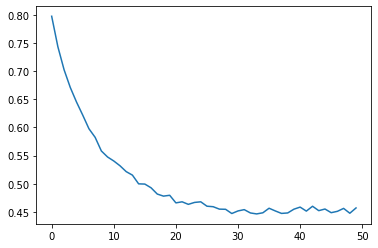

In [109]:
plot_coops(avg_coops, 50)

In [89]:
lbls = np.random.choice(100, replace=False, size=100)
mapping = {i : lbls[i] for i in range(100)}
H = nx.relabel_nodes(G, mapping)

In [90]:
print([n for n in H.nodes])

[70, 7, 3, 77, 74, 30, 4, 61, 57, 9, 99, 48, 64, 58, 96, 42, 1, 81, 51, 29, 21, 85, 69, 16, 17, 32, 8, 44, 6, 31, 36, 27, 91, 15, 60, 50, 66, 38, 59, 25, 11, 20, 26, 0, 34, 94, 92, 49, 71, 80, 24, 46, 23, 65, 2, 93, 28, 13, 89, 40, 67, 47, 55, 84, 79, 52, 19, 83, 62, 95, 45, 73, 53, 41, 18, 33, 68, 35, 78, 90, 22, 82, 76, 37, 98, 72, 88, 14, 75, 87, 12, 63, 5, 54, 39, 10, 43, 56, 86, 97]


In [91]:
print([n for n in G.nodes])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


In [97]:
print([n for n in G.neighbors(1)])
print([n for n in H.neighbors(1)])

[0, 2]
[42, 81]


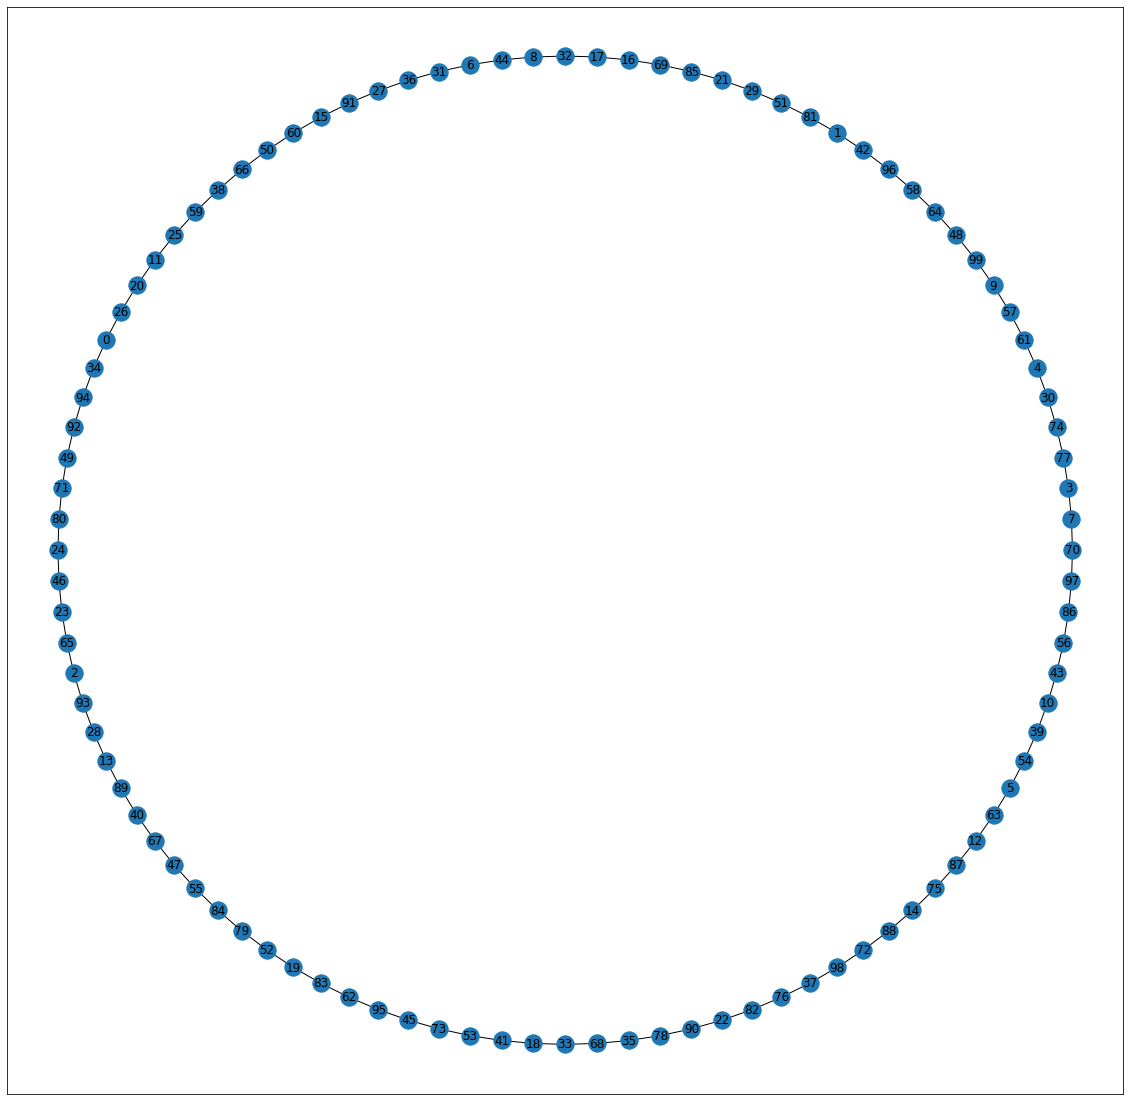

In [99]:
pos = nx.circular_layout(H)
plt.figure(3,figsize=(20,20)) 
nx.draw_networkx(H, pos=pos, with_labels=True)
    